# Analisando as Campanhas do IFood 

A entrega de comida tornou-se um dos serviços de destaque adotados pela indústria de restaurantes. As pessoas estão preferindo pedir comida online, já que raramente encontram tempo para comprar mantimentos e cozinhar alimentos. 

IFood é um aplicativo líder em delivery de alimentos no Brasil e presente em mais de mil cidades. Atualmente eles têm por volta de várias centenas de milhares de clientes registrados e atendem a quase um milhão de consumidores por ano. 

IFood vende produtos de 5 categorias principais: vinhos, produtos de carnes, frutas exóticas, produtos preparados com peixes e produtos doces. Estes podem ser divididos em produtos ouro e regulares. Os clientes podem solicitar e adquirir produtos por meio de 3 canais de vendas: lojas físicas, catálogos e o site da empresa.

## Contexto do Dataset

Este conjunto de dados apresenta informações sobre os clientes e as interações da campanha iFood com esse clientes. 

Link do dataset: <a href="https://www.kaggle.com/georgerocha/ifooddataadvancedanalyticstest?select=iFood-Advanced-Data-Analyst-Case.pdf" target='_blanck'>IFood-data-advanced-analytics-test</a>


## Objetivo

Estudar os o perfil dos usuários do aplicativo, encontrar oportunidades de negócios e insights.

## 1. Importando as Bibliotecas e os Dados

In [1]:
import pandas as pd
pd.set_option('display.max_columns',50) 
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [2]:
# Importando os dados
delivery = pd.read_csv('ml_project1_data.csv')

# 2. Entendendo os Dados

Vamos começar compreendendo os dados usando as funções integradas do pandas.

In [3]:
# Exibindo infomações do dataset

print(f"Os dataset possui {delivery.shape[0]} linhas e {delivery.shape[1]} colunas")

print(delivery.info())

Os dataset possui 2240 linhas e 29 colunas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  


O dataset tem 29 colunas contendo características sociodemográficas e firográficas sobre 2.240 clientes que
foram contatados durante uma campanha da empresa. Além disso, contém um sinalizador para os clientes que responderam positivamente à campanha comprando o produto. O conteúdo das colunas são:

* AcceptedCmp1 ->  se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
* AcceptedCmp2 ->  se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
* AcceptedCmp3 ->  se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
* AcceptedCmp4 ->  se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
* AcceptedCmp5 ->  se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
* Response (target) -> 1 se o cliente aceitou a oferta na última
* Complain -> 1 se o cliente reclamar nos últimos 2 anos
* Dt_Customer -> data de inscrição do cliente na empresa
* Education -> Nível de educação do cliente
* Marital -> Estado civil do cliente
* Kidhome -> número de crianças pequenas na casa do cliente
* Teenhome -> número de adolescentes na casa do cliente
* ID -> identificação do cliente
* Income -> renda familiar anual do cliente
* MntFishProducts -> quantidade gasta em produtos de peixe nos últimos 2 anos
* MntMeatProducts -> quantidade gasta em produtos de carne nos últimos 2 anos
* MntFruits - > quantidade gasta em produtos de frutas nos últimos 2 anos
* MntSweetProducts -> quantidade gasto em produtos doces nos últimos 2 anos 
* MntWines -> quantidade gasto em produtos vinhos nos últimos 2 anos
* MntGoldProds -> quantidade gasto em produtos ouro nos últimos 2 anos
* NumDealsPurchases -> número de compras feitas com desconto
* NunCatalogPurchases ->  número de compras feitas usando o catálogo
* NunStorePurchases -> número de compras feitas diretamente nas lojas
* NumWebPurchases -> número de compras feitas através do site da empresa
* NumWebVisitsMonth -> número de visitas ao site da empresa no último mês
* Recency -> Número de dias desde a última compra
* Year_Birth -> ano de nascimento do cliente

Aqui alteramos o formato da coluna Dt_Customer para np.data

In [4]:
delivery['Dt_Customer'] = pd.to_datetime(delivery['Dt_Customer'],format="%Y-%m-%d")

Vamos deletar as duas últimas colunas Z_CostContact e Z_Revenue

In [5]:
delivery = delivery.drop(["Z_CostContact","Z_Revenue"],axis=1)

## 3. Espiando e Descrevendo os Dados
Vamos usar funções simples no conjunto de dados para ver os seus números. 

In [6]:
# Exibe as primeiras 5 linhas 
delivery.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


* Existem muitas variáveis numéricas epoucas variáveis categóricas, mesmo assim as que existem precisam ser codificadas.

Vamos olhar se existem dados não válidos.

In [7]:
# Exibe dados nulos
def missing_data(df):
    missing_data = df.isnull().sum() #total de null    
    total = missing_data.sort_values(ascending=True) #ordenação 
    percent = (missing_data / len(df.index)*100).round(2).sort_values(ascending=True) #cálculo percentual
    missing_table = pd.concat([total, percent], axis=1, keys=['Qty NaN', '% NaN'])
    return missing_table

missing_data(delivery)

,Qty NaN,% NaN
ID,0,0.00
AcceptedCmp2,0,0.00
AcceptedCmp1,0,0.00
AcceptedCmp5,0,0.00
AcceptedCmp4,0,0.00
AcceptedCmp3,0,0.00
NumWebVisitsMonth,0,0.00
NumStorePurchases,0,0.00
NumCatalogPurchases,0,0.00
NumWebPurchases,0,0.00


* A coluna Income é a única com dados faltantes, que representam 1% do total de linhas da coluna. 

* Como essa porcentagem é muito pequena, podemos preencher esses valor médio.

In [8]:
delivery['Income'].fillna(delivery['Income'].mean(),inplace=True)

In [9]:
# Mostra as linhas com ano de nascimento menor que 1940
delivery.loc[delivery['Year_Birth'] < 1940]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [10]:
# Apaga as linhas
delivery = delivery.drop([192,239,339],axis=0)

Vamos criar uma nova coluna com a idade dos clientes

In [11]:
age = 2020 - delivery.Year_Birth.values
delivery["Age"] = age 

Podemos olhar as estatísticas de cada coluna numérica.

In [12]:
delivery.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2237.0,5590.726419,3245.118591,0.0,2829.0,5455.0,8427.0,11191.0
Year_Birth,2237.0,1968.901654,11.701917,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2237.0,52236.696036,25043.111847,1730.0,35523.0,51717.0,68281.0,666666.0
Kidhome,2237.0,0.444345,0.538467,0.0,0.0,0.0,1.0,2.0
Teenhome,2237.0,0.506482,0.544593,0.0,0.0,0.0,1.0,2.0
Recency,2237.0,49.104604,28.956073,0.0,24.0,49.0,74.0,99.0
MntWines,2237.0,303.995530,336.574382,0.0,24.0,174.0,504.0,1493.0
MntFruits,2237.0,26.270451,39.715972,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2237.0,166.916853,225.661158,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2237.0,37.523022,54.639909,0.0,3.0,12.0,50.0,259.0


* Os Clientes possuem de 0-2 crianças/adolescentes em casa

* O menor registro de Year_Birth é 1893, o que não faz sentido. Essa coluna precisa de um processamento para ser limpa de dados errados.

In [13]:
# Mostra as linhas com estado civil = 'Absurd'
delivery.loc[delivery['Marital_Status'] == 'Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,1,27
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0,63


In [14]:
# Apaga as linhas
delivery = delivery.drop([2093,2134],axis=0)

In [15]:
# Cópia dos dados
delivery_copy = delivery.copy()

Vamos limpar um pouco os dados substituindo outliers pelo valor médio de cada coluna numérica.

In [16]:
delivery.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age'],
      dtype='object')

In [17]:


# Seleciona os dados do tipo numérico
outlier = ['Income', 'Age', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

def cap_outliers(df, col):
    
    df_summary = df.describe()
    q1 = df_summary[col].loc["25%"] 
    q3 = df_summary[col].loc["75%"] 
    iqr = q3 - q1 
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df.loc[df[col] < lower_bound, col] = df_summary[col].loc["mean"] 
    df.loc[df[col] > upper_bound, col] = df_summary[col].loc["mean"]
    return df

for col in outlier:
    delivery_copy = cap_outliers(delivery, col)



## 4. Análise por Tabelas de Pivotamento

Agora vamos usar a função pivot_table do pandas para processar os números e verificar se existe alguma relação entre as variáveis. 

### Análise Demográfica

In [18]:
# Estado civil dos clientes
delivery_pivot1 = pd.pivot_table(delivery, index=["Marital_Status"],
                                values=['Age','Kidhome','Teenhome'],margins=True,
                                aggfunc=[np.median,len])

# Adicionar gradiente de cores
cm = sns.light_palette("green", as_cmap=True)
delivery_pivot1.style.background_gradient(cmap=cm)

Insights:

* A idade dos solteiros é de 48, dos sozinhos é de 47 anos com 1 criança e 1 adolescente em casa 
* A idade dos divorciados/viúvas é de 52/62 com 1 adolescente em casa
* Os casados tem idade de 49, os que moram juntos tem 51 anos e 1 adolescente em casa.

In [19]:
# Renda
delivery_pivot2 = pd.pivot_table(delivery,index=["Education"],
                                 values=["Age", "Kidhome", "Teenhome"],margins=True,
                                 aggfunc=[np.median,len])

# Adicionando gradiente de cores
cm2 = sns.light_palette("blue", as_cmap=True)
delivery_pivot2.style.background_gradient(cmap=cm2)

Insights:

* A idade média dos clientes com educação básica e 2°ciclo é de 41 e 45 anos, respectivamente.
* Para graduados a idade média é de 50 anos 
* Mestres e PhDs tem idade média de 52 e 53 anos com 1 adolescente em casa

## 5. Análise Exploratória dos Dados - Univariante

Aqui pegamos cada variável e analisamos uma por uma.

### Dados Sóciodemográficos

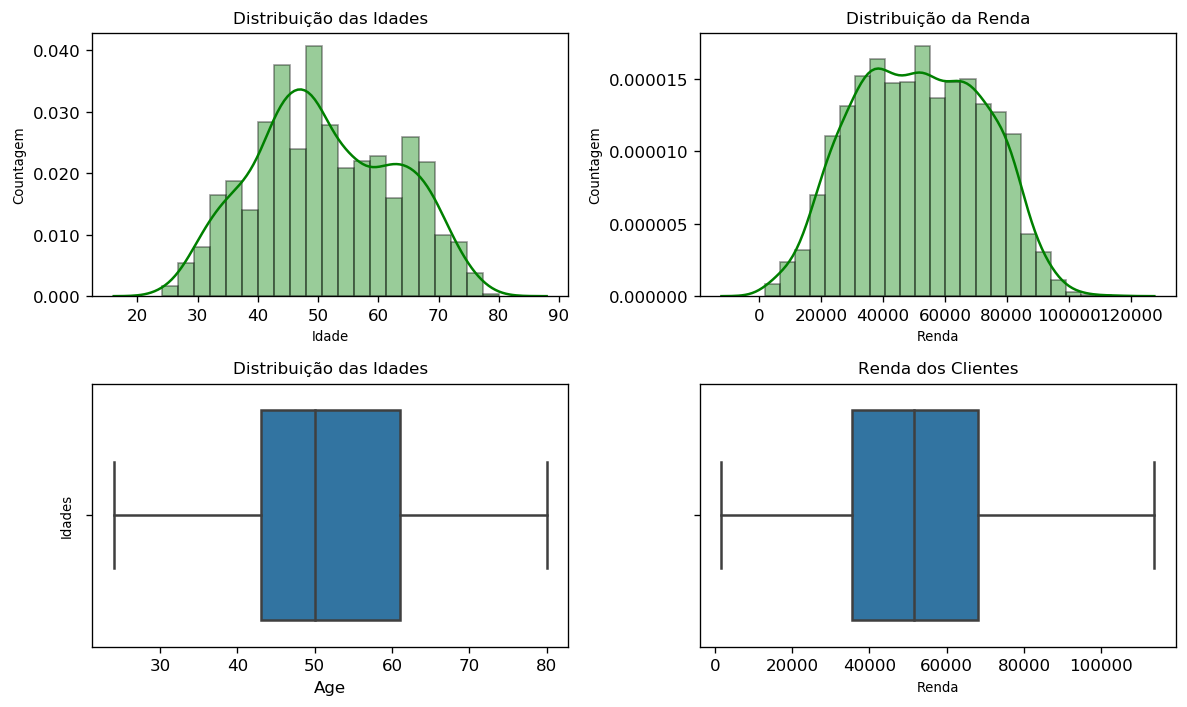

In [20]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (10,6))

# Distibuição as idades
plot00 = sns.distplot(delivery_copy['Age'],ax=axes[0][0],color='green',hist_kws=dict(edgecolor="k", linewidth=1))
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribuição das Idades',fontdict={'fontsize':10})
axes[0][0].set_xlabel('Idade',fontdict={'fontsize':8})
axes[0][0].set_ylabel('Countagem',fontdict={'fontsize':8})
plt.tight_layout()

# Distribuição da Renda
plot01 = sns.distplot(delivery_copy['Income'],ax=axes[0][1],color='green',hist_kws=dict(edgecolor="k", linewidth=1))
axes[0][1].set_title('Distribuição da Renda',fontdict={'fontsize':10})
axes[0][1].set_xlabel('Renda',fontdict={'fontsize':8})
axes[0][1].set_ylabel('Countagem',fontdict={'fontsize':8})
#axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.tight_layout()

# Idade-Boxplot
plot10=sns.boxplot(delivery_copy['Age'],ax=axes[1][0])
axes[1][0].set_title('Distribuição das Idades',fontdict={'fontsize':10})
axes[1][0].set_ylabel(r'Idades',fontdict={'fontsize':8})
plt.tight_layout()

# Renda-Boxplot
plot11=sns.boxplot(delivery_copy['Income'],ax=axes[1][1])
axes[1][1].set_title(r'Renda dos Clientes',fontdict={'fontsize':10})
axes[1][1].set_xlabel('Renda',fontdict={'fontsize':8})
plt.tight_layout()

plt.show()

Insights:

* Idade e Renda são distribuições normais

* A média de idade está entre 50 e a renda está em torno e 50000 

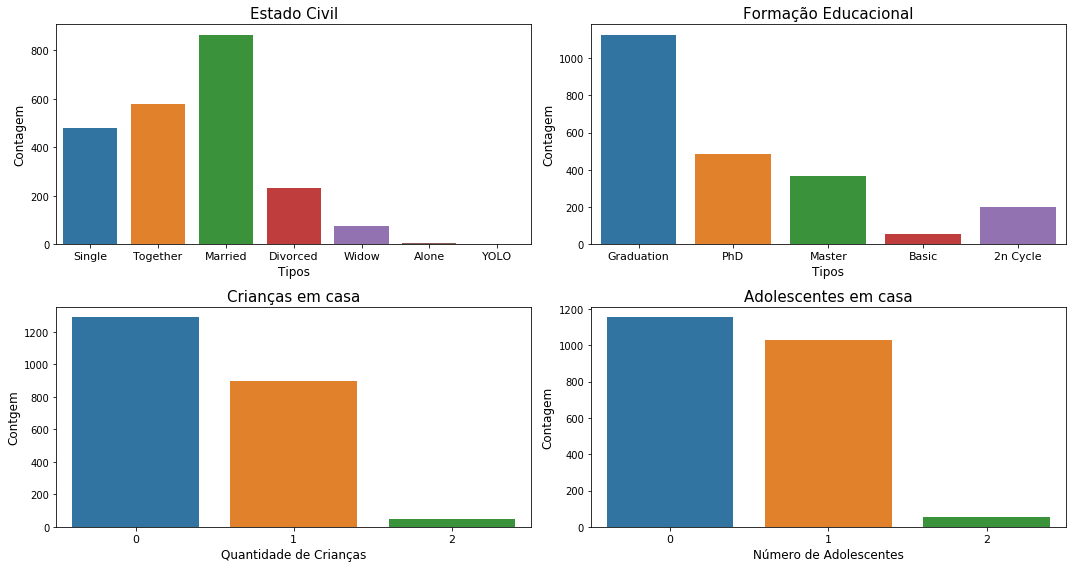

In [21]:
plt.figure(figsize = (15, 8))

# Estado Civil
plt.subplot(2,2,1)
ax = sns.countplot(x="Marital_Status", data=delivery_copy)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Estado Civil',fontsize = 15)
ax.set_xlabel('Tipos',fontsize = 12) 
ax.set_ylabel('Contagem', fontsize = 12)
plt.tight_layout()

# Educação
plt.subplot(2,2,2)
ax = sns.countplot(x="Education", data=delivery_copy)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Formação Educacional',fontsize = 15)
ax.set_xlabel( 'Tipos',fontsize = 12) 
ax.set_ylabel('Contagem', fontsize = 12)
plt.tight_layout()

# Crianças
plt.subplot(2,2,3)
ax = sns.countplot(x="Kidhome", data=delivery_copy)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Crianças em casa',fontsize = 15)
ax.set_xlabel('Quantidade de Crianças',fontsize = 12) 
ax.set_ylabel('Contgem', fontsize = 12)
plt.tight_layout()

# Adolescentes
plt.subplot(2,2,4)
ax = sns.countplot(x="Teenhome", data=delivery_copy)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Adolescentes em casa',fontsize = 15)
ax.set_xlabel('Número de Adolescentes',fontsize = 12) 
ax.set_ylabel('Contagem', fontsize = 12)
plt.tight_layout()

* A maioria dos clientes são casados, com graduação e sem crianças e/ou adolescentes em casa ou 1 adolescente em casa.

### Demanda de Produtos

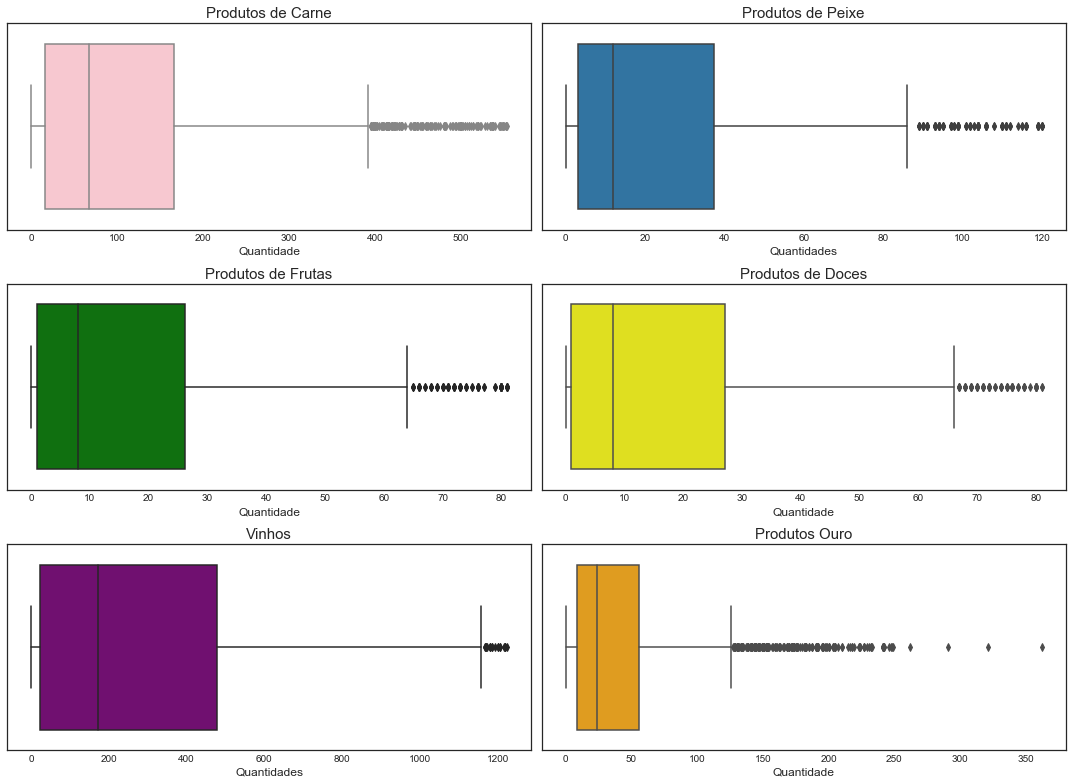

In [22]:
plt.figure(figsize = (15, 11))
plt.style.use('seaborn-white')

# Carnes
plt.subplot(3,2,1)
ax = sns.boxplot(delivery_copy["MntMeatProducts"],color='pink')
ax.set_title('Produtos de Carne',fontsize = 15)
ax.set_xlabel('Quantidade',fontsize = 12) 
plt.tight_layout()

# Peixe
plt.subplot(3,2,2)
ax = sns.boxplot(delivery_copy["MntFishProducts"])
ax.set_title('Produtos de Peixe',fontsize = 15)
ax.set_xlabel('Quantidades',fontsize = 12) 
plt.tight_layout()

# Frutas
plt.subplot(3,2,3)
ax = sns.boxplot(delivery_copy["MntFruits"],color='green')
ax.set_title('Produtos de Frutas',fontsize = 15)
ax.set_xlabel( 'Quantidade',fontsize = 12) 
plt.tight_layout()

# Doces
plt.subplot(3,2,4)
ax = sns.boxplot(delivery_copy["MntSweetProducts"],color='yellow')
ax.set_title('Produtos de Doces',fontsize = 15)
ax.set_xlabel('Quantidade',fontsize = 12) 
plt.tight_layout()

# Vinhos
plt.subplot(3,2,5)
ax = sns.boxplot(delivery_copy["MntWines"],color='purple')
ax.set_title('Vinhos',fontsize = 15)
ax.set_xlabel('Quantidades',fontsize = 12) 
plt.tight_layout()

# Gold
plt.subplot(3,2,6)
ax = sns.boxplot(delivery_copy["MntGoldProds"],color='orange')
ax.set_title('Produtos Ouro',fontsize = 15)
ax.set_xlabel( 'Quantidade',fontsize = 12) 
plt.tight_layout()

Insigths:
* Os produtos mais consumidos por todos os clientes são os produtos regulares de carnes e vinho.

* Frutas e doces são consumidos em menor quantidade.

* Grande consumo de produtos de peixe e ouro são eventos restritos a uma parcela dos clientes.

### Canais de Vendas

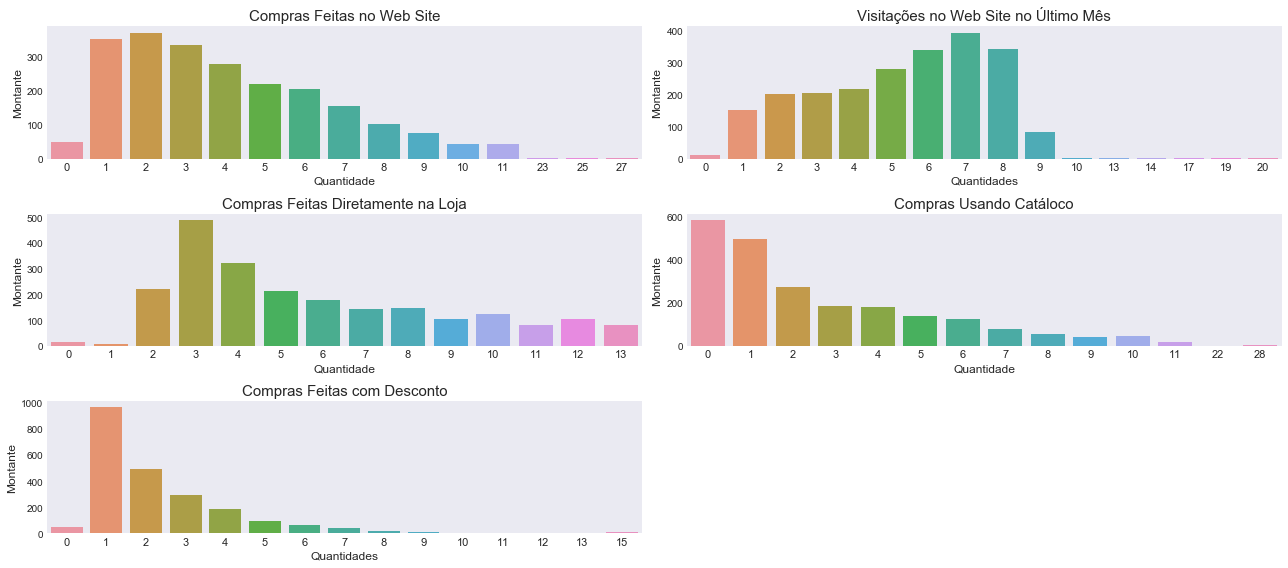

In [23]:
plt.figure(figsize = (18, 8))
plt.style.use('seaborn-dark')

# Compras na Web
plt.subplot(3,2,1)
ax = sns.countplot(x="NumWebPurchases", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Compras Feitas no Web Site',fontsize = 15)
ax.set_xlabel('Quantidade',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()

# Visitações site
plt.subplot(3,2,2)
ax = sns.countplot(x="NumWebVisitsMonth", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Visitações no Web Site no Último Mês',fontsize = 15)
ax.set_xlabel('Quantidades',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()

# Loja
plt.subplot(3,2,3)
ax = sns.countplot(x="NumStorePurchases", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Compras Feitas Diretamente na Loja',fontsize = 15)
ax.set_xlabel( 'Quantidade',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()

# Catálogo
plt.subplot(3,2,4)
ax = sns.countplot(x="NumCatalogPurchases", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Compras Usando Catáloco',fontsize = 15)
ax.set_xlabel('Quantidade',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()

# Compras com desconto
plt.subplot(3,2,5)
ax = sns.countplot(x="NumDealsPurchases", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Compras Feitas com Desconto',fontsize = 15)
ax.set_xlabel('Quantidades',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()



Insigths:

A maioria dos clientes já compraram:
* No web site pelo menos 2 ou 1 vezes;

* Visitaram o site no último mês de 7 a 8 vezes;

* Na loja 3 ou 4 vezes;

* Nunca compraram por catálogo ou pelo menos 1 vez;

* Já realizaram 1 ou 2 compras com desconto. 

### Aceitação da Campanha de Oferta

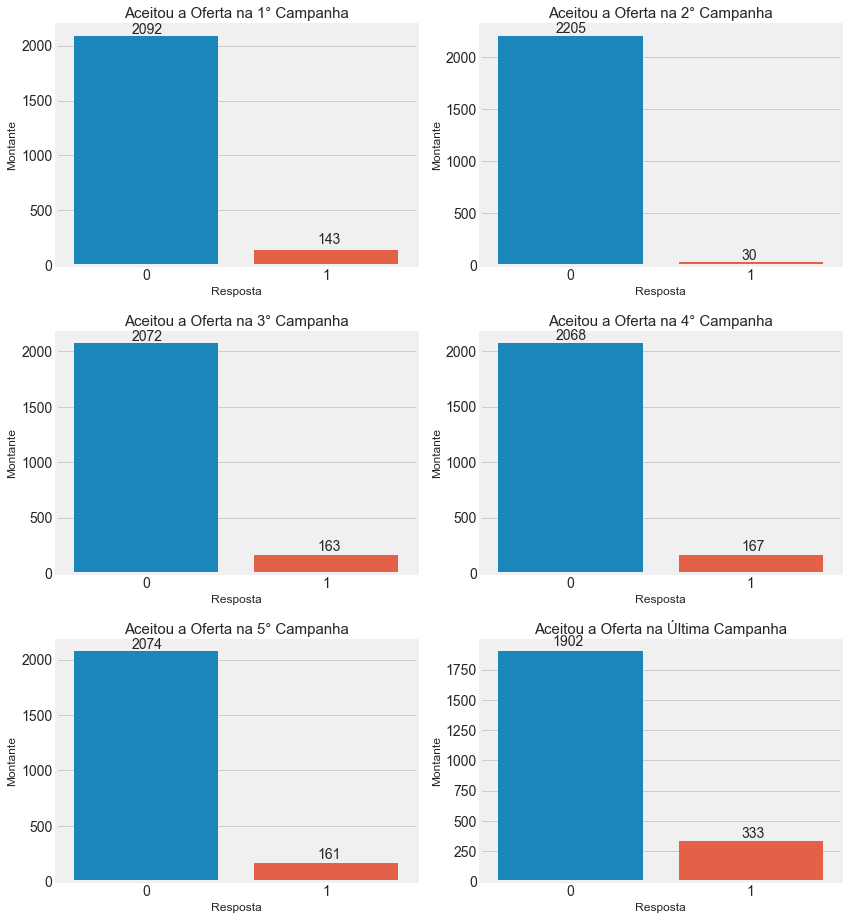

In [24]:
plt.figure(figsize = (12, 13))
plt.style.use('fivethirtyeight')

# 1 campanha
plt.subplot(3,2,1)
ax = sns.countplot(x="AcceptedCmp1", data=delivery)
ax.set_title('Aceitou a Oferta na 1° Campanha',fontsize = 15)
ax.text(-0.08,2110,delivery.AcceptedCmp1.value_counts()[0])
ax.text(0.95,200,delivery.AcceptedCmp1.value_counts()[1])
ax.set_xlabel( 'Resposta',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)

# 2 campanha
plt.subplot(3,2,2)
ax = sns.countplot(x="AcceptedCmp2", data=delivery)
ax.set_title('Aceitou a Oferta na 2° Campanha',fontsize = 15)
ax.text(-0.08,2230,delivery.AcceptedCmp2.value_counts()[0])
ax.text(0.95,50,delivery.AcceptedCmp2.value_counts()[1])
ax.set_xlabel( 'Resposta',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)

# 3 campanha
plt.subplot(3,2,3)
ax = sns.countplot(x="AcceptedCmp3", data=delivery)
ax.set_title('Aceitou a Oferta na 3° Campanha',fontsize = 15)
ax.text(-0.08,2100,delivery.AcceptedCmp3.value_counts()[0])
ax.text(0.95,200,delivery.AcceptedCmp3.value_counts()[1])
ax.set_xlabel( 'Resposta',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)

# 4 campanha
plt.subplot(3,2,4)
ax = sns.countplot(x="AcceptedCmp4", data=delivery)
ax.set_title('Aceitou a Oferta na 4° Campanha',fontsize = 15)
ax.text(-0.08,2100,delivery.AcceptedCmp4.value_counts()[0])
ax.text(0.95,200,delivery.AcceptedCmp4.value_counts()[1])
ax.set_xlabel( 'Resposta',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)

# 5 campanha
plt.subplot(3,2,5)
ax = sns.countplot(x="AcceptedCmp5", data=delivery)
ax.set_title('Aceitou a Oferta na 5° Campanha',fontsize = 15)
ax.text(-0.08,2100,delivery.AcceptedCmp5.value_counts()[0])
ax.text(0.95,200,delivery.AcceptedCmp5.value_counts()[1])
ax.set_xlabel( 'Resposta',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()

# Resposta Final
plt.subplot(3,2,6)
ax = sns.countplot(x="Response", data=delivery)
ax.set_title('Aceitou a Oferta na Última Campanha',fontsize = 15)
ax.text(-0.1,1950,delivery.Response.value_counts()[0])
ax.text(0.95,360,delivery.Response.value_counts()[1])
ax.set_xlabel( 'Resposta',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()

Insigths:

Durante uma campanha de oferta, os clientes possuem uma tendência de:

* ter uma rejeição maior na 2° campanha;

* uma aceitação maior da oferta nas 3°, 4° e 5° campanhas que na 1°, em quantidades semelhantes.

* um dobro de aceitação da oferta na última campanha em relação a 1°campanha. 


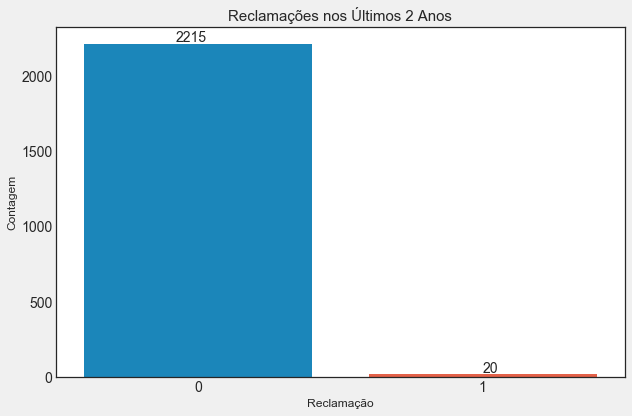

In [25]:
plt.figure(figsize = (9, 6))
plt.style.use('seaborn-white')

# Reclamações
sns.countplot(x="Complain", data=delivery)
plt.title('Reclamações nos Últimos 2 Anos',fontsize = 15)
plt.text(-0.08,2230,delivery_copy.Complain.value_counts()[0])
plt.text(1,30,delivery_copy.Complain.value_counts()[1])
plt.xlabel('Reclamação',fontsize = 12) 
plt.ylabel('Contagem', fontsize = 12)
plt.tight_layout()

* Muito poucos, menos de 1%, dos clientes do aplicativo reclamaram nos últimos 2 anos

### Adeção dos Clientes

Vamos analisar em quais períodos e épocas ocorreram maior adesão de clientes no aplicativo.

In [26]:
datas = pd.DataFrame()
# Seleciona o dia da semana
datas["dias_semana"] = delivery["Dt_Customer"].dt.dayofweek
datas["dias_semana"] = datas["dias_semana"].map(
                                            {0:"Seg", 1:"Ter", 2:"Qua", 
                                            3:"Qui", 4:"Sex", 5:"Sab", 6:"Dom"})

# Seleciona o mês
datas["mes"] = pd.DatetimeIndex(delivery["Dt_Customer"]).month.map(
                                {1:"Jan", 2:"Fev", 3:"Mar", 4:"Abr", 
                                5:"Mai", 6:"Jun",  7:"Jul", 8:"Ago", 
                                9:"Set", 10:"Out", 11:"Nov", 12:"Dez"})
# Seleciona o ano
datas["ano"] = pd.DatetimeIndex(delivery["Dt_Customer"]).year


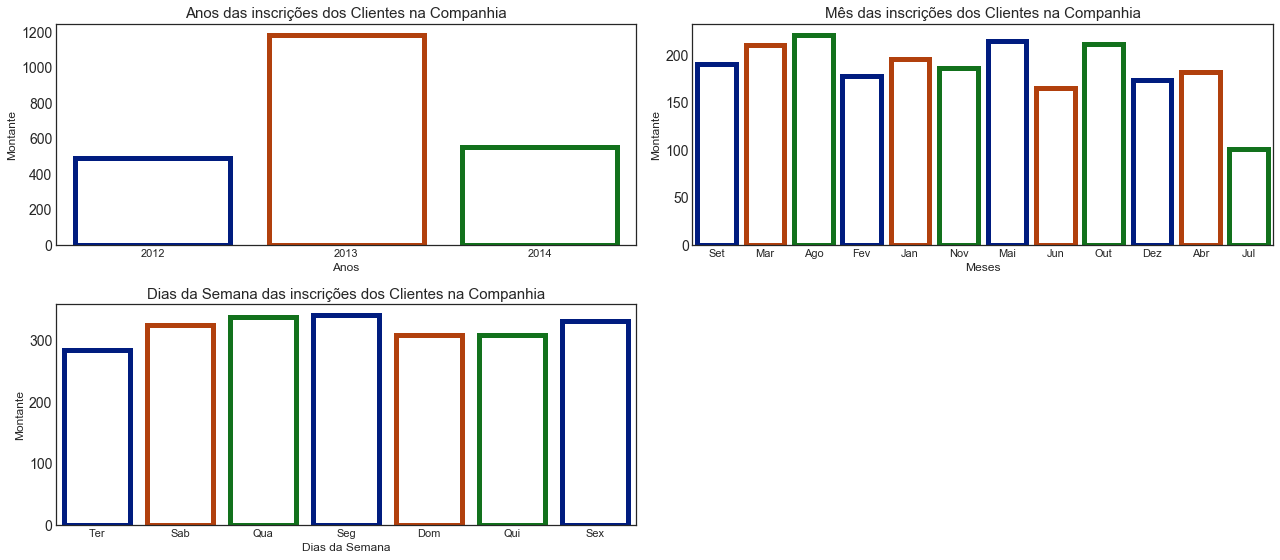

In [27]:
plt.figure(figsize = (18, 8))
plt.style.use('seaborn-white')

# Ano da Inscrição
plt.subplot(2,2,1)
ax = sns.countplot(x="ano", data=datas,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Anos das inscrições dos Clientes na Companhia',fontsize = 15)
ax.set_xlabel('Anos',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()

# Mês da Inscrição
plt.subplot(2,2,2)
ax = sns.countplot(x="mes", data=datas,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Mês das inscrições dos Clientes na Companhia',fontsize = 15)
ax.set_xlabel('Meses',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()

# Dia da semana
plt.subplot(2,2,3)
ax = sns.countplot(x="dias_semana", data=datas,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Dias da Semana das inscrições dos Clientes na Companhia',fontsize = 15)
ax.set_xlabel('Dias da Semana',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()


* O ano com maior quantidade de adesão foi em 2013

* Os meses com maior número de inscritos foi em agosto, maio, março e outubro.

* Novos clientes entraram no aplicativos na segunda-feira e quarta-feira.

## 6. Análise Exploratória - Bivariante

### Perfil dos Clientes nas Campanhas

Estado civil e nível educacional dos clientes que mais aceitaram (última campanha) e mais recusaram (2° campanha) as ofertas.

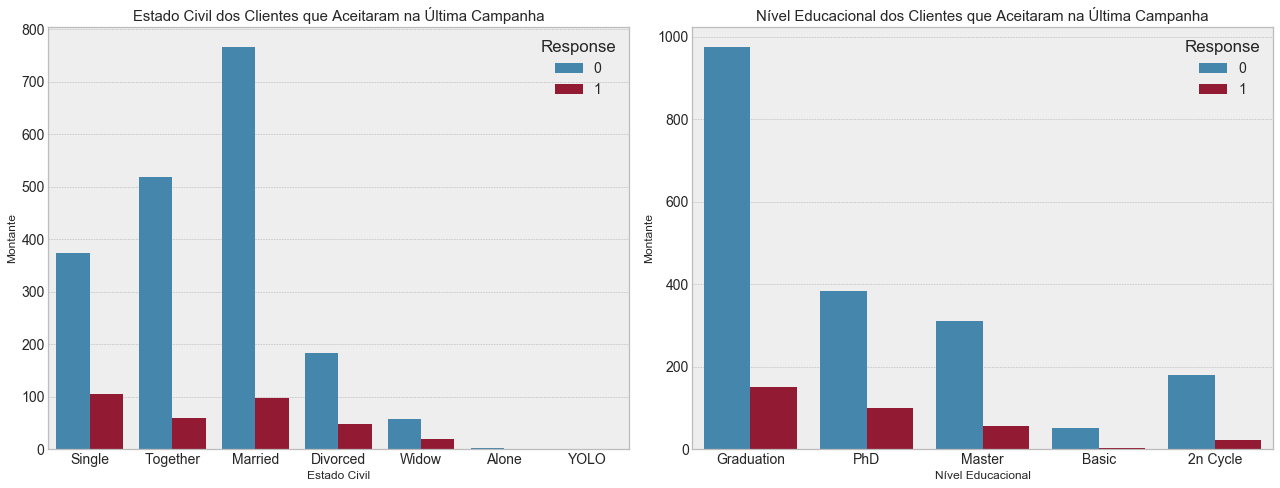

In [28]:
plt.figure(figsize=(18, 7))
plt.style.use('bmh')

plt.subplot(1,2,1)
ax = sns.countplot(data=delivery,x="Marital_Status", hue="Response")
ax.set_title('Estado Civil dos Clientes que Aceitaram na Última Campanha',fontsize = 15)
ax.set_xlabel('Estado Civil',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()

plt.subplot(1,2,2)
ax = sns.countplot(data=delivery,x="Education", hue="Response")
ax.set_title('Nível Educacional dos Clientes que Aceitaram na Última Campanha',fontsize = 15)
ax.set_xlabel('Nível Educacional',fontsize = 12) 
ax.set_ylabel('Montante', fontsize = 12)
plt.tight_layout()


Insigths:

Os clientes que responderam positivamente na última campanha da oferta são:
* Solteiros e casados;

* Graduados e PhDs.

## Produtos Mais Comprados pelo Estado Civil

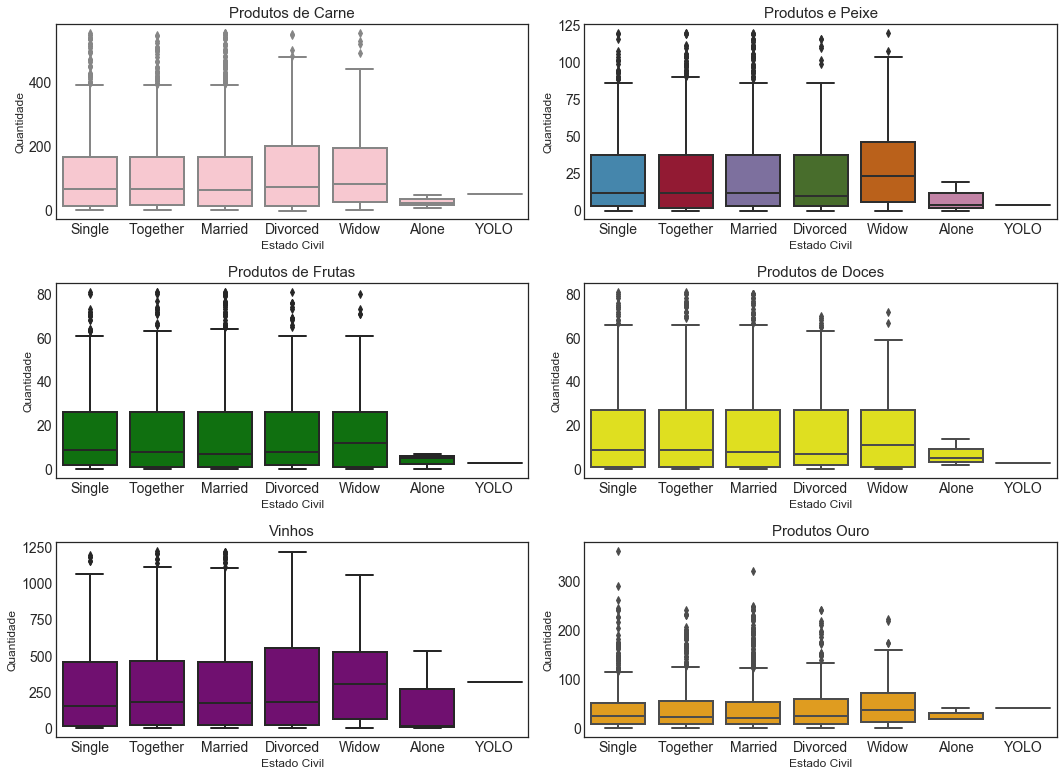

In [29]:
plt.figure(figsize = (15, 11))
plt.style.use('seaborn-white')

# Carnes
plt.subplot(3,2,1)
ax = sns.boxplot(x=delivery["Marital_Status"], y=delivery_copy["MntMeatProducts"],color='pink')
ax.set_title('Produtos de Carne',fontsize = 15)
ax.set_xlabel('Estado Civil',fontsize = 12)
ax.set_ylabel('Quantidade',fontsize = 12) 
plt.tight_layout()

# Peixe
plt.subplot(3,2,2)
ax = sns.boxplot(x=delivery["Marital_Status"],y=delivery_copy["MntFishProducts"])
ax.set_title('Produtos e Peixe',fontsize = 15)
ax.set_xlabel('Estado Civil',fontsize = 12)
ax.set_ylabel('Quantidade',fontsize = 12)  
plt.tight_layout()

# Frutas
plt.subplot(3,2,3)
ax = sns.boxplot(x= delivery['Marital_Status'], y=delivery_copy["MntFruits"],color='green')
ax.set_title('Produtos de Frutas',fontsize = 15)
ax.set_xlabel('Estado Civil',fontsize = 12)
ax.set_ylabel('Quantidade',fontsize = 12) 
plt.tight_layout()

# Doces
plt.subplot(3,2,4)
ax = sns.boxplot(x=delivery["Marital_Status"], y=delivery_copy["MntSweetProducts"],color='yellow')
ax.set_title('Produtos de Doces',fontsize = 15)
ax.set_xlabel('Estado Civil',fontsize = 12)
ax.set_ylabel('Quantidade',fontsize = 12) 
plt.tight_layout()

# Vinhos
plt.subplot(3,2,5)
ax = sns.boxplot(x=delivery["Marital_Status"], y=delivery_copy["MntWines"],color='purple')
ax.set_title('Vinhos',fontsize = 15)
ax.set_xlabel('Estado Civil',fontsize = 12)
ax.set_ylabel('Quantidade',fontsize = 12) 
plt.tight_layout()

# Gold
plt.subplot(3,2,6)
ax = sns.boxplot(x =delivery["Marital_Status"], y=delivery_copy["MntGoldProds"],color='orange')
ax.set_title('Produtos Ouro',fontsize = 15)
ax.set_xlabel('Estado Civil',fontsize = 12)
ax.set_ylabel('Quantidade',fontsize = 12) 
plt.tight_layout()

Insigths:
* Produtos e carne são consumidos igualmente entre os clientes de todos os estados civis.

* Viúvas são as que, em média, consomem mais vinhos, produtos ouro, de peixe, doces e frutas.

## Conclusão



Poemos tirar as seguintes conclusões:

* Os clientes tendem a rejeitarem mais fortemente uma oferta durante a 2° campanha, porém a aceitam a oferta na última campanha com um índice muito maior.

* Clientes casados e solteiros, com sem crianças/adolescentes ou com 1 adolescente em casa, com graduação ou PhDs são os que mais respondem positivamente a uma campanha de oferta.

* Produtos de carne e vinho são os mais consumidos.

* Clientes compram quase o dobro de vezes na loja do que no web site.

* Os meses de agosto, maio, março e outubro e nos dias de segunda-feira e quart-feira são os períodos onde os clientes mais se increvem no aplicativo.

* Viúvas são as que mais utilizam o aplicativo.

## Consideração Final: 

**Para uma resposta positiva na campanha de uma oferta sugere-se direcionar para clientes casados com graduação ou viúvas, sendo a última campanha preferencialmente nos meses de março, maio, agosto, ou otubro e nos dias da semana segunda-feira ou quarta-feira.**